## Table of Contents

* [Homework# 1](#Homework#1)
    * [Initialisation Package Import/Install](#Import_Packages)
    * [Load Data into DataFrame](#Data_Load)
    * [DataFrame Statisitics](#DataFrame_Statistics)
    * [DataFrame Formating](#DataFrame_Formating)
    * [KNeighbors Classifier](#KNeighborsClassifier)
    * [Dataset Predictions](#Predictions)
* [Homework# 2](#Homework#2)
    * [Histogram Plots](#Histograms)
    * [Mean and STD](#Mean_STD)
    * [Median and IQR](#Median_IQR)
    * [Bootstrap method](#Bootstrap)

* Author: Gerti Kulla
* Class: Cisc7700X Brooklyn College

# Homework#1

CISC 7700X HW# 1 (due by 2nd class;): Using the Iris dataset, build a kNN model to identify the IRIS species of a flower given sepal_length, sepal_width, petal_length,petal_width. Feel free to use whatever language/tool you are comfortable with. I encourage you to write C/C++/Java/C#/SQL/Python code. You may also use Excel, or Weka or Colab or whatever other library/tool you find. Submit (via email), the model code.

## Import_Packages

In [1]:
#!pip install seaborn scipy
#!pip install -U scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from scipy.stats import bootstrap

## Data_Load

In [83]:
#Reading excel data into DataFrame

df = pd.read_csv(r'http://theparticle.com/cs/bc/dsci/iris.csv')

## DataFrame_Statistics

In [84]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DataFrame_Formating

In [85]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]
Y = df['species'][1:] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## KNeighborsClassifier

In [86]:
model = KNeighborsClassifier(n_neighbors=7).fit(X_train,Y_train)
model

KNeighborsClassifier(n_neighbors=7)

In [87]:
model.score(X_train, Y_train)

0.9831932773109243

In [88]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,119.000000,119.000000,119.000000,119.000000
mean,5.815126,3.036975,3.753782,1.196639
std,0.826124,0.441274,1.747870,0.747417
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.300000,3.300000,5.050000,1.800000
max,7.900000,4.400000,6.700000,2.500000


## Predictions

In [89]:
prediction1 = model.predict([[6,2.7,4.2,1.2]])
print(prediction1)

['versicolor']


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [90]:
prediction2 = model.predict([[5.1,3.8,1.5,0.3]])
print(prediction2)

['setosa']


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


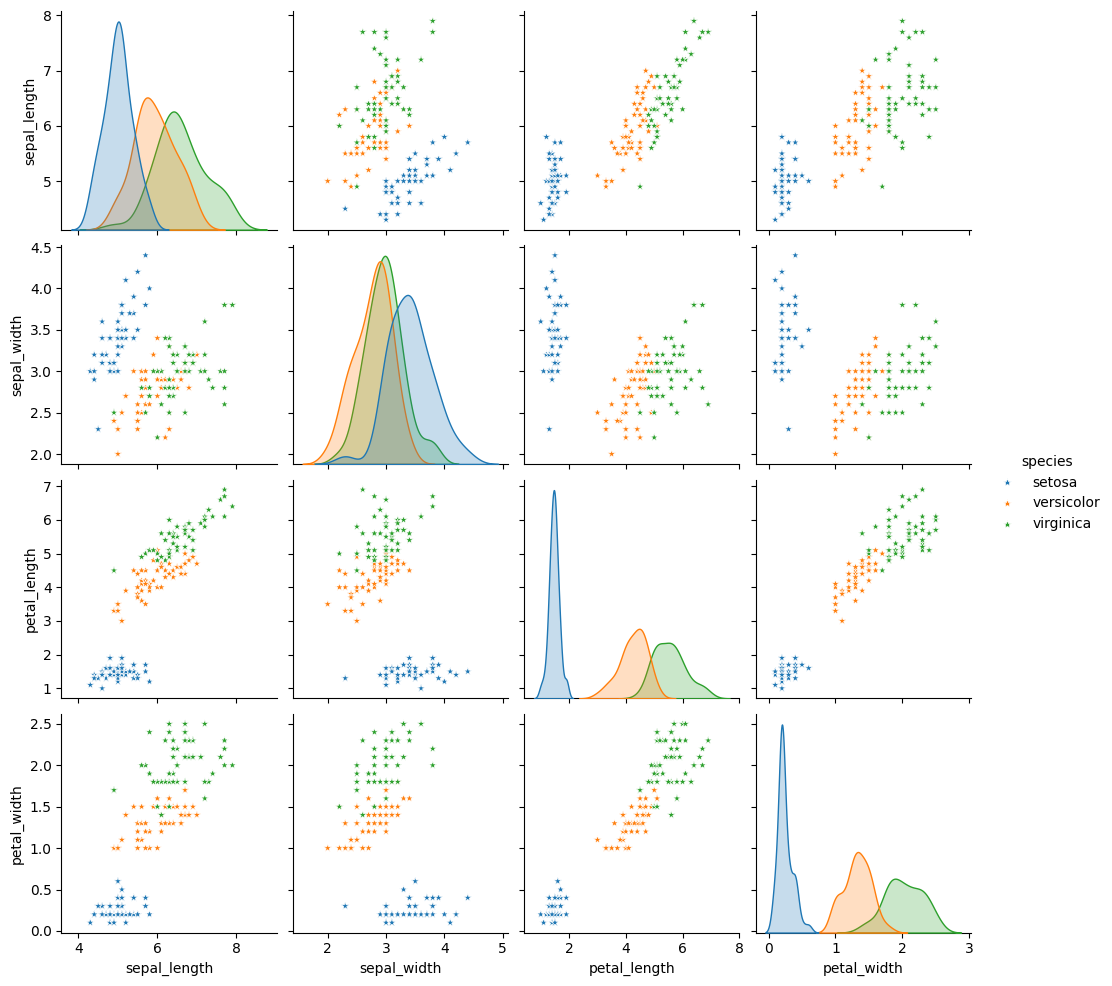

In [91]:
g = sns.pairplot(df, hue='species', markers='*')
plt.show()

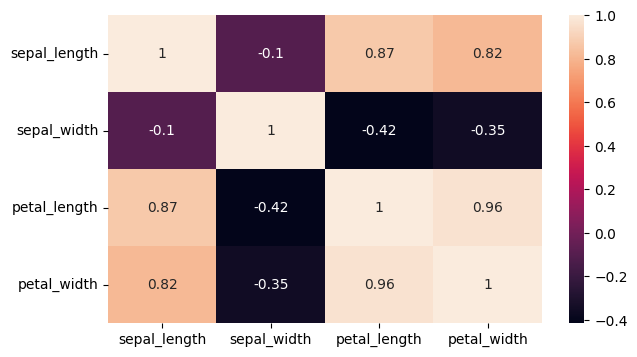

In [92]:
plt.figure(figsize=(7,4)) 
sns.heatmap(X.corr(),annot=True)
plt.show()

# Homework#2

CISC 7700X HW# 2: Continuing with the Iris dataset, plot the histograms for each of the attributes: sepal_length, sepal_width, petal_length, petal_width. Find the average and standard deveation for sepal_length, sepal_width, petal_length, petal_width for each label. Find the median and IQR for sepal_length, sepal_width, petal_length, petal_width for each label. Use bootstrap method to find error bounds on all of the above.

## Histograms

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

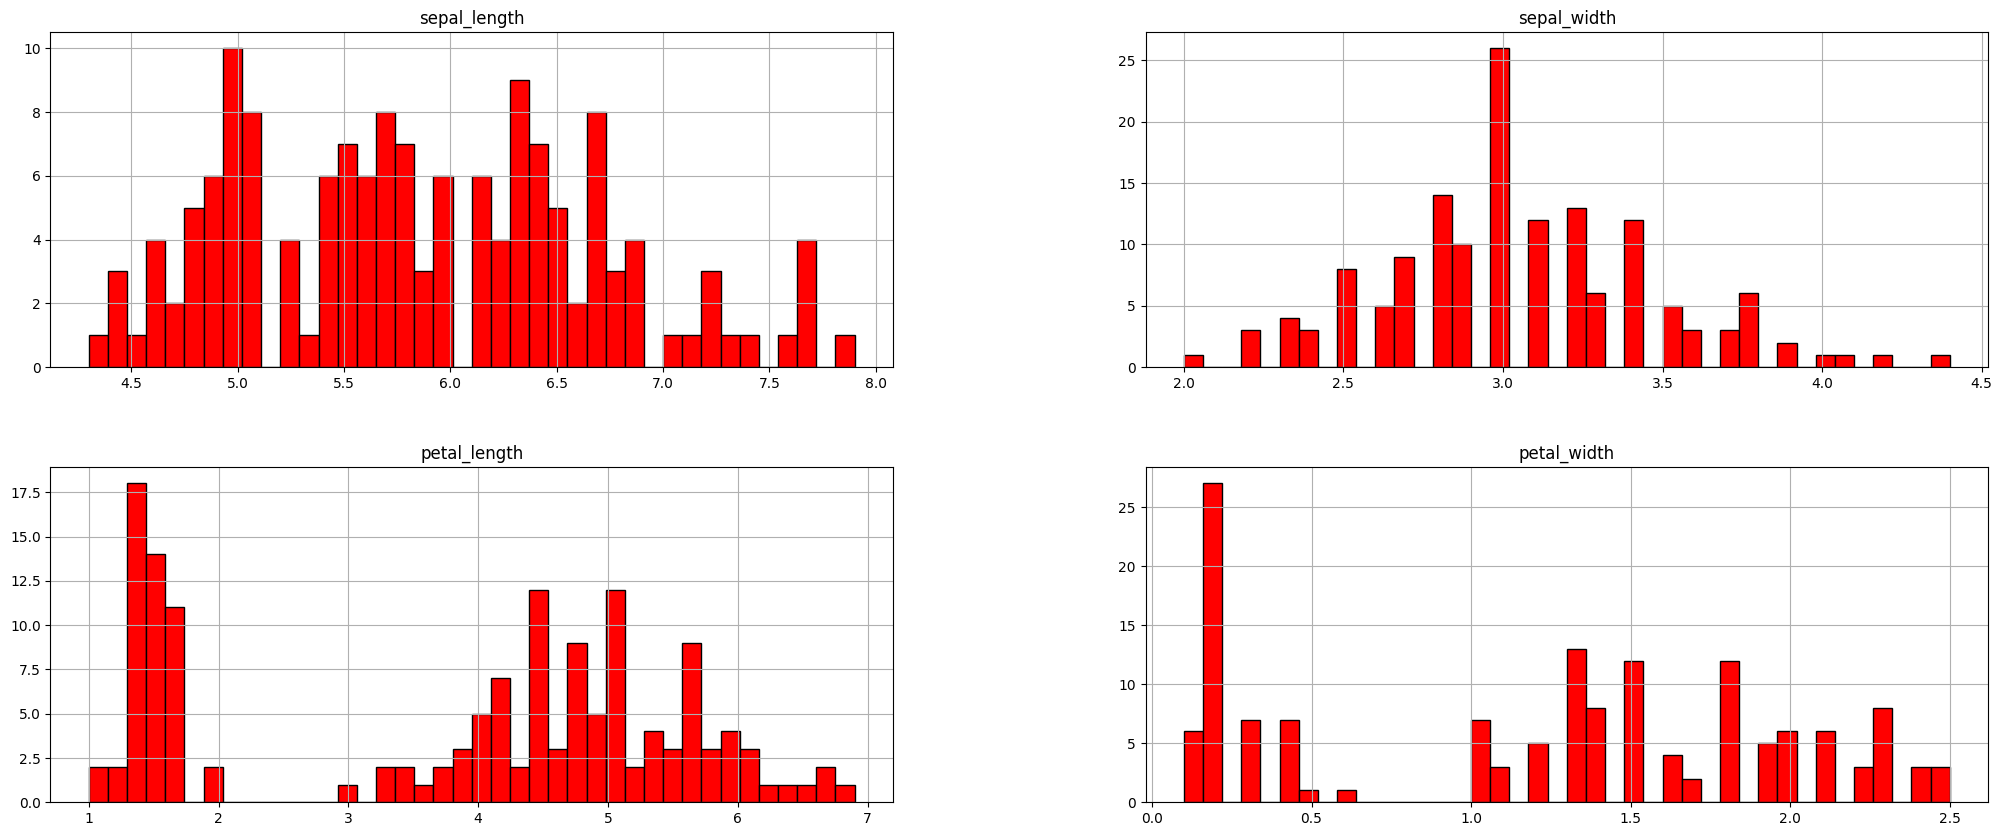

In [93]:
df_noHeader=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:] #).apply(pd.to_numeric)
fig, axis = plt.subplots(2, 2, figsize = (25, 10))
df_noHeader.hist(ax=axis, edgecolor='black', grid=True, bins = 40, color = "red")

## Mean_STD

In [95]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

X_data = df[1:][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]#).apply(pd.to_numeric)
Y_data = df[1:][['species']]
df_tot = pd.concat([X_data, Y_data], axis=1)

df_tot1 = df_tot.groupby('species').agg({'sepal_length': ['mean', 'std', 'median', q1, q3]})
df_tot2 = df_tot.groupby('species').agg({'sepal_width': ['mean', 'std', 'median', q1, q3]})
df_tot3 = df_tot.groupby('species').agg({'petal_length': ['mean', 'std', 'median', q1, q3]})
df_tot4 = df_tot.groupby('species').agg({'petal_width': ['mean', 'std', 'median', q1, q3]})
print(df_tot1, df_tot2, df_tot3, df_tot4)

           sepal_length                             
                   mean       std median     q1   q3
species                                             
setosa         5.004082  0.355879    5.0  4.800  5.2
versicolor     5.936000  0.516171    5.9  5.600  6.3
virginica      6.588000  0.635880    6.5  6.225  6.9            sepal_width                               
                  mean       std median     q1     q3
species                                              
setosa        3.416327  0.384787    3.4  3.100  3.700
versicolor    2.770000  0.313798    2.8  2.525  3.000
virginica     2.974000  0.322497    3.0  2.800  3.175            petal_length                             
                   mean       std median   q1     q3
species                                             
setosa         1.465306  0.175061   1.50  1.4  1.600
versicolor     4.260000  0.469911   4.35  4.0  4.600
virginica      5.552000  0.551895   5.55  5.1  5.875            petal_width                  

In [96]:
X_data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][1:]#).apply(pd.to_numeric)

col_median = X_data.median()
col_std = X_data.std()
col_mean = X_data.mean()
col_quantile_25 = X_data.quantile(0.25)
col_quantile_75 = X_data.quantile(0.75)
IQR = col_quantile_75 - col_quantile_25
IQR

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [40]:
print(round(X['sepal_length'].apply(pd.to_numeric).describe().loc[['mean','std']],4))

mean    5.8433
std     0.8281
Name: sepal_length, dtype: float64


In [39]:
print(round((X['sepal_width'].apply(pd.to_numeric).describe().loc[['mean','std']]),4))

mean    3.0540
std     0.4336
Name: sepal_width, dtype: float64


In [36]:
print(round((X['petal_length'].apply(pd.to_numeric).describe().loc[['mean','std',]]),4))

mean    3.7587
std     1.7644
Name: petal_length, dtype: float64


In [38]:
print(round((X['petal_width'].apply(pd.to_numeric).describe().loc[['mean','std']]),4))

mean    1.1987
std     0.7632
Name: petal_width, dtype: float64


## Median_IQR

In [68]:
round((X['sepal_length'].apply(pd.to_numeric)).median(),4)

5.8

In [71]:
Q1_SL = (X['sepal_length'].apply(pd.to_numeric)).quantile(0.25)
Q3_SL = (X['sepal_length'].apply(pd.to_numeric)).quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
round(IQR_SL,2)

1.3

In [ ]:
round((X['sepal_width'].apply(pd.to_numeric)).median(),4)

In [ ]:
Q1_SL = (X['sepal_width'].apply(pd.to_numeric)).quantile(0.25)
Q3_SL = (X['sepal_width'].apply(pd.to_numeric)).quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
round(IQR_SL,2)

In [ ]:
round((X['petal_length'].apply(pd.to_numeric)).median(),4)

In [ ]:
Q1_SL = (X['petal_length'].apply(pd.to_numeric)).quantile(0.25)
Q3_SL = (X['petal_length'].apply(pd.to_numeric)).quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
round(IQR_SL,2)

In [ ]:
round((X['petal_width'].apply(pd.to_numeric)).median(),4)

In [ ]:
Q1_SL = (X['petal_width'].apply(pd.to_numeric)).quantile(0.25)
Q3_SL = (X['petal_width'].apply(pd.to_numeric)).quantile(0.75)
IQR_SL = Q3_SL - Q1_SL
round(IQR_SL,2)

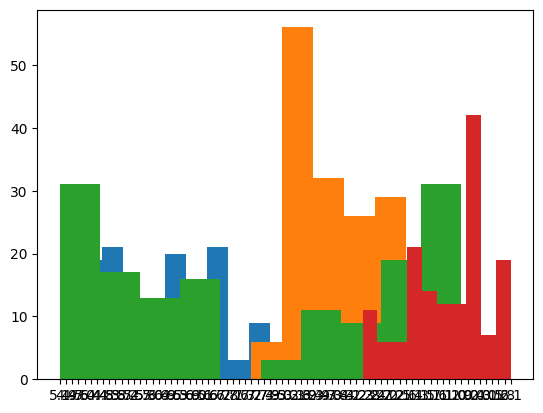

In [55]:
# Plot histogram of versicolor petal lengths
hist_sepal_length = plt.hist(X['sepal_length'])
hist_sepal_width = plt.hist(X['sepal_width'])
hist_petal_length = plt.hist(X['petal_length'])
hist_petal_width = plt.hist(X['petal_width'])

#_ = plt.plot(X, Y, marker = '.', linestyle = 'none')

# Show histogram
plt.show()

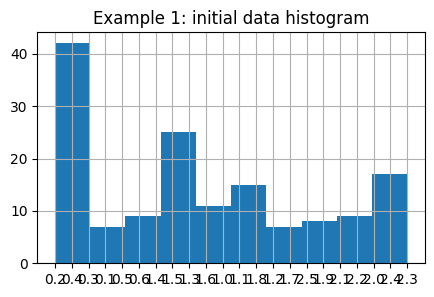

In [6]:

X['petal_width'].hist(figsize=(5, 3))
plt.title("Example 1: initial data histogram")
plt.show()

In [21]:
upper_quantiles = []
lower_quantiles = []

x = X['petal_width'].apply(pd.to_numeric)
#subsample = x.sample(frac=1, replace=True)
#print(subsample.info()) #.quantile(0.99))

for i in range(1000):
    subsample = x.sample(frac=1, replace=True)
    upper_quantiles.append(subsample.quantile(0.95))
    lower_quantiles.append(subsample.quantile(0.2))

upper_quantiles = pd.Series(upper_quantiles)
lower_quantiles = pd.Series(lower_quantiles)



1      0.2
2      0.2
3      0.2
4      0.2
5      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 150, dtype: float64


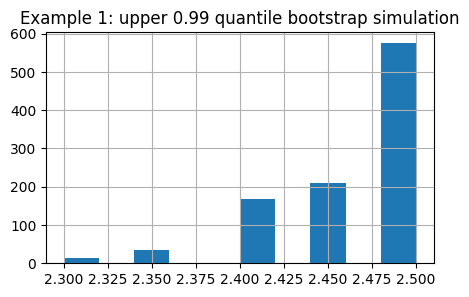

In [14]:
upper_quantiles.hist(figsize=(5, 3))
plt.title("Example 1: upper 0.99 quantile bootstrap simulation")
plt.show()

In [8]:
# upper 0.99 quantile lies in this interval with 95% confidence
print(f'{upper_quantiles.quantile(0.025):.2f}') # Out: 94.89
print(f'{upper_quantiles.quantile(0.975):.2f}') # Out: 98.69

# lower 0.01 quantile lies in this interval with 95% confidence
print(f'{lower_quantiles.quantile(0.025):.2f}') # Out: 0.55
print(f'{lower_quantiles.quantile(0.975):.2f}') # Out: 4.62

2.20
2.40
0.20
0.38


In [34]:
#print(x)
data = x.to_numpy()
print(x.describe())
data = (data,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(data, np.std, confidence_level=0.95,random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64
ConfidenceInterval(low=np.float64(0.707022630453654), high=np.float64(0.8071304451837964))
